In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['stores data-set.csv', 'sales data-set.csv', 'Features data set.csv']


In [2]:
features = pd.read_csv("../input/Features data set.csv")
sales = pd.read_csv("../input/sales data-set.csv")
#stores = pd.read_csv("../input/stores data-set.csv")

In [3]:
features['Date'] = pd.to_datetime(features['Date'])
features = features.fillna(0)
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [4]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [32]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False
5,1,1,2010-12-03,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-02-04,57258.43,False
9,1,1,2010-09-04,42960.91,False


# Part 1 - Data Analysis

Cum arata datele si ce contin. Combinarea surselor

In [22]:
import matplotlib.pyplot as plt

data_in = pd.merge(features, sales, on=['Store', 'Date', 'IsHoliday'], how='inner')

In [40]:
filter_dept = data_in['Dept']== 5
filtered_data = data_in[filter_dept]

filter_sale = filtered_data['Weekly_Sales'] == 259955.820000
filtered_data[filter_sale]

,Store,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales
90884,10,0.0,0.0,0.0,0.0,0.0,126.983581,9.003,5,259955.82


In [106]:
data_in = pd.merge(features, sales, on=['Store', 'Date', 'IsHoliday'], how='inner')

max_sales_per_store = data_in.groupby(by=['Store'], as_index=False)['Weekly_Sales'].max()
max_sales_per_store

max_sale_features = pd.DataFrame(columns=list(data_in))
for entry in max_sales_per_store['Weekly_Sales']:
    filter_sale =data_in['Weekly_Sales']== entry
    max_sale_features = max_sale_features.append(pd.DataFrame(data_in[filter_sale], columns=list(data_in)))

max_sale_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
6784,1,2011-11-25,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True,72,203670.47
13293,2,2010-11-26,62.98,2.735,0.00,0.00,0.00,0.00,0.00,211.406287,8.163,True,72,285353.53
20517,3,2010-05-02,45.71,2.572,0.00,0.00,0.00,0.00,0.00,214.424881,7.368,False,38,155897.94
36312,4,2011-11-25,47.96,3.225,561.45,137.88,83340.33,44.04,9239.23,129.836400,5.143,True,72,385051.04
45745,5,2011-11-25,61.93,3.236,107.42,7.00,29333.06,8.00,826.06,219.042820,6.300,True,72,93517.72
51826,6,2010-11-26,65.79,2.735,0.00,0.00,0.00,0.00,0.00,213.267296,7.007,True,72,342578.65
65444,7,2011-11-25,27.60,3.424,35.94,6.47,41487.59,12.00,905.95,195.770400,8.513,True,72,222921.09
71724,8,2010-11-26,51.07,2.735,0.00,0.00,0.00,0.00,0.00,215.107755,6.433,True,72,153431.69
84492,9,2011-11-25,54.32,3.236,121.57,0.00,44061.13,247.83,8294.47,222.138968,6.054,True,72,139427.43
90645,10,2010-11-26,55.33,3.162,0.00,0.00,0.00,0.00,0.00,126.669267,9.003,True,72,693099.36


*Comentarii:* 

Am luat cateva departamente sa vad cum arata celelalte variabile cand vanzarile sunt maxime. Apoi am facut un tabel cu vanzarile maxime per magazin ca sa vad cum variaza celelalte variabile. Se observa ca MarkDowns au influente intamplatoare la unele magazine (se va observa acelasi lucru si in graficele de mai jos). In schimb se observa la coloanele de Temperature, CPI si Unemployment ca variatiile sunt mai mici. De asemenea, temperatura pare a ramane medie, lucru care se observa si din graficul de mai jos: cand temperaturile sunt extreme, vanzarile scad. Un lucru iarasi de notat este faptul ca unele departamente au cu preponderenta vanzari maxime.

Cum evolueaza vanzarile per total in timp.

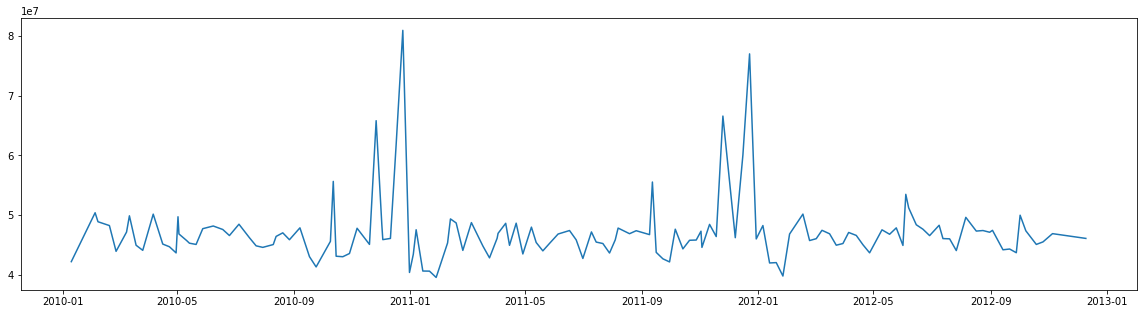

In [23]:
data_in_analysis = data_in.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
data_in_analysis.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(data_in_analysis.Date, data_in_analysis.Weekly_Sales)
plt.show()

In [35]:
data_analysis = data_in.groupby(by=['Store'], as_index=False)['Weekly_Sales'].sum()
data_analysis


Evolutia vanzarilor in functie de features.



In [24]:
def scatter(dataset, feature):
    plt.figure()
    plt.scatter(data_in[feature] , data_in['Weekly_Sales'])
    plt.ylabel('weeklySales')
    plt.xlabel(feature)

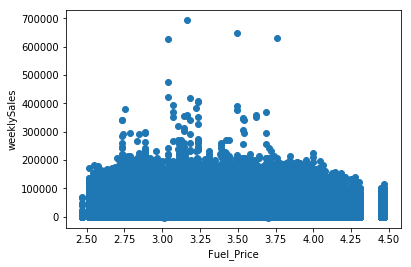

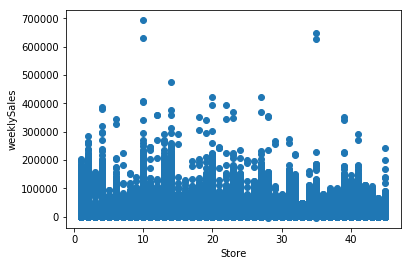

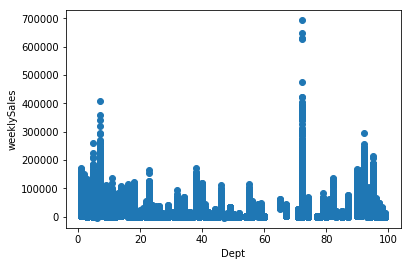

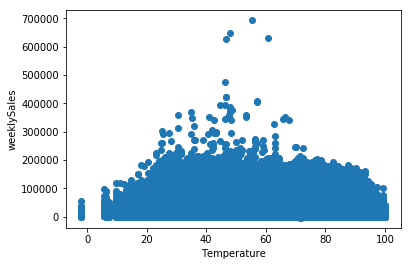

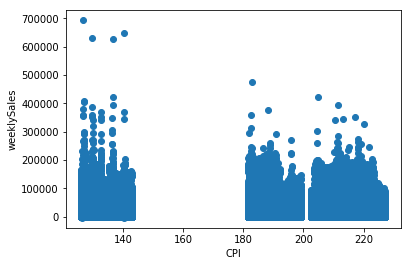

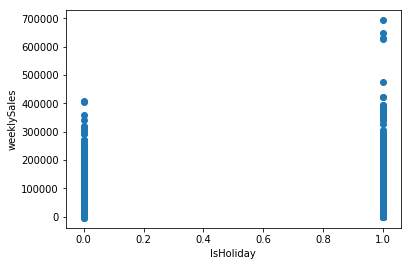

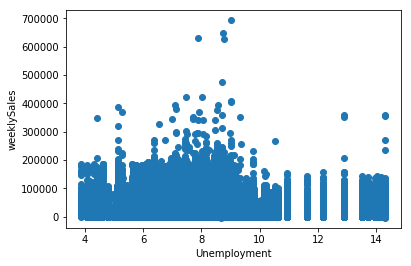

In [25]:
scatter(data_in, 'Fuel_Price')
scatter(data_in, 'Store')
scatter(data_in, 'Dept')
scatter(data_in, 'Temperature')
scatter(data_in, 'CPI')
scatter(data_in, 'IsHoliday')
scatter(data_in, 'Unemployment')


Evolutia vanzarilor in functie de oferte.



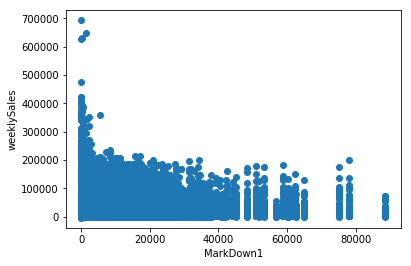

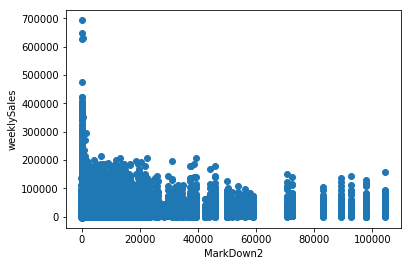

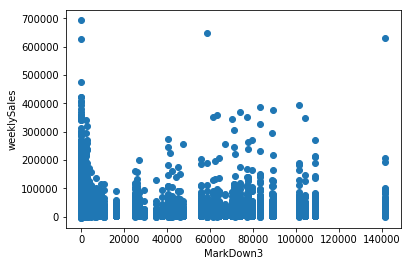

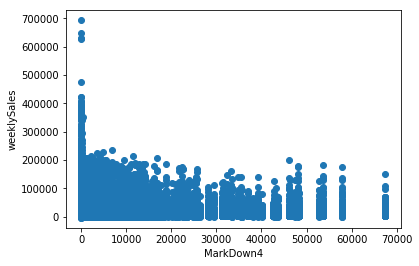

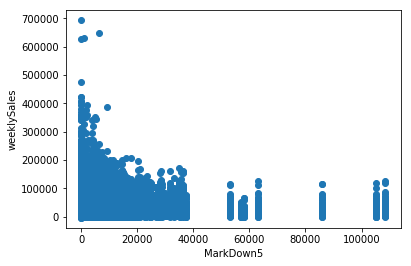

In [26]:
scatter(data_in, 'MarkDown1')
scatter(data_in, 'MarkDown2')
scatter(data_in, 'MarkDown3')
scatter(data_in, 'MarkDown4')
scatter(data_in, 'MarkDown5')

Matricea de corelate - cum sunt coloanele corelate intre ele.

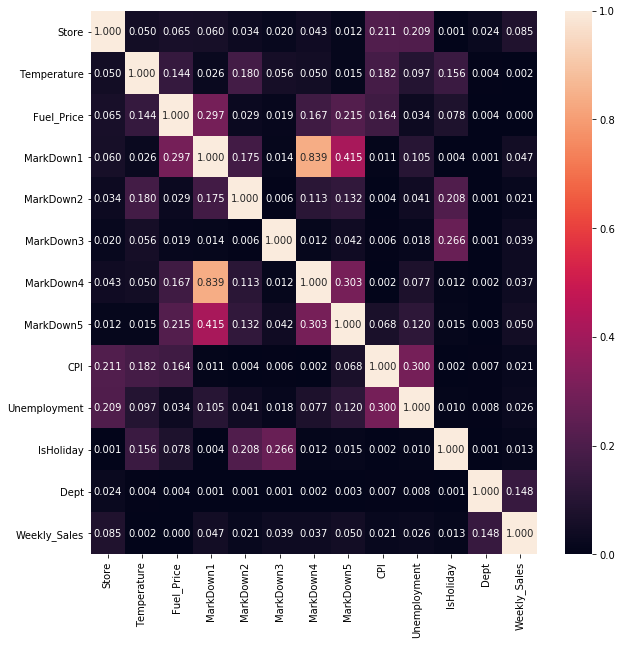

In [120]:
import seaborn as sns

corr = data_in.corr()
corr = abs(corr)
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [121]:
corr['Weekly_Sales'].sort_values(ascending=False)

Weekly_Sales    1.000000
Dept            0.148032
Store           0.085195
MarkDown5       0.050465
MarkDown1       0.047172
MarkDown3       0.038562
MarkDown4       0.037467
Unemployment    0.025864
CPI             0.020921
MarkDown2       0.020716
IsHoliday       0.012774
Temperature     0.002312
Fuel_Price      0.000120
Name: Weekly_Sales, dtype: float64

In [124]:
data_in = pd.merge(features, sales, on=['Store', 'Date', 'IsHoliday'], how='inner')
data_in = data_in.drop(columns = ['Date'])

print(data_in.values.shape)
data_in[:][100:105]

(421570, 13)


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
100,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.24217,8.106,True,29,7696.61
101,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.24217,8.106,True,30,5328.50
102,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.24217,8.106,True,31,3228.96
103,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.24217,8.106,True,32,14700.59
104,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.24217,8.106,True,33,8483.54


# Part 2 - Data modeling and prediction

Pentru modelare vom explora 2 experimente: variatii de model si variatii de date.

* Experimente pe modele: <br/>
    Vom incerca mai multe tipuri de modele si le vom evalua folosind mai multe metrici; la final vom selecta 1-2 modele care converg si ofera o performanta rezonabila, in termeni de acuratete.
* Experimente pe date: <br/>
    Vom incerca sa folosim diverse combinatii de features din datele puse la dispozitie si vom selecta cele unde modelele propuse la 2.a se comporta cel mai bine: ofera o convergenta relativ rapida si o performanta rezonabila
    
Dupa cele doua analize vom selecta un candidat cu cea mai mica eroare de predictie.

### A) Experimente pe modele

Nu avem date test, asa ca voi folosi din datele puse la dispozitie 10% pentru validarea modelului.

In [129]:
from sklearn.model_selection import train_test_split

x = data_in.drop(columns=['Weekly_Sales'])
y = data_in['Weekly_Sales']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.1, random_state = 0)
print(xTrain.shape, yTrain.shape)

(379413, 12) (379413,)


#### Modelul de baza - Linear Regression

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, make_scorer

model = LinearRegression()
model.fit(xTrain, yTrain)
yPredict = pd.Series(model.predict(xTest))
err = mean_absolute_error(yTest, yPredict)
print('{:.3f}'.format(err))

15150.463


In [127]:
model.score(xTest, yTest)

0.04032547837445066

*Comentarii:* converge rapid dar eroarea este prea mare. Practic nici nu se apropie de o predictie.

#### Retea de neuroni

In [130]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV


model = MLPRegressor(hidden_layer_sizes=(20,),  activation='tanh', solver = 'adam', max_iter=30, alpha=0.001, batch_size='auto',
    verbose=3)
model.fit(xTrain, yTrain)
yPredict = pd.Series(model.predict(xTest))
err = mean_absolute_error(yTest, yPredict)
print('{:.3f}'.format(err))



Iteration 1, loss = 383178849.79866529
Iteration 2, loss = 382511320.89455581
Iteration 3, loss = 381902160.67157167
Iteration 4, loss = 381301312.04236794
Iteration 5, loss = 380702514.44602692
Iteration 6, loss = 380105741.01241249
Iteration 7, loss = 379510603.53035933
Iteration 8, loss = 378912958.85949898
Iteration 9, loss = 378315182.61559790
Iteration 10, loss = 377715695.89667314
Iteration 11, loss = 377122895.45326513
Iteration 12, loss = 376532496.84497017
Iteration 13, loss = 375944288.74191558
Iteration 14, loss = 375358181.72503555
Iteration 15, loss = 374766248.60515749
Iteration 16, loss = 374177936.31988931
Iteration 17, loss = 373504010.39478815
Iteration 18, loss = 372667383.90963179
Iteration 19, loss = 372061430.35053736
Iteration 20, loss = 371458503.20957398
Iteration 21, loss = 370854492.61382276
Iteration 22, loss = 370254858.76823443
Iteration 23, loss = 369649356.56775546
Iteration 24, loss = 369052128.51567942
Iteration 25, loss = 368458952.37039346
Iteration

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


*Comentarii*: 

Modelul nu converge, sau pare sa convearga foarte lent. Loss-function are o evolutie foarte inceata. Am incercat sa miscorez learning-rate (pasul gradientului) si sa maresc numarul de iteratii, insa comportamentul este asemanator. In concluzie, acest tip de retele neuronale nu se comporta cum trebuie la tipul nostru de date.

#### Decision Trees

In [131]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5)

model.fit(xTrain, yTrain)
yPredict = pd.Series(model.predict(xTest))
err = mean_absolute_error(yTest, yPredict)
print('{:.3f}'.format(err))

9883.271


In [132]:
model.score(xTest, yTest)

0.5083219137714041

*Comentarii: *

Decision Trees incep sa convearga iar eroarea absoluta scade. Scorul insa este inca foarte mic. Vom incerca si alte variatiuni de decision trees sa vedem daca putem imbunatati scorul.

#### Random decision trees

In [133]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=1)

model.fit(xTrain, yTrain)
yPredict = pd.Series(model.predict(xTest))
err = mean_absolute_error(yTest, yPredict)
print('{:.3f}'.format(err))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1875.004


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.1s finished


In [134]:
model.score(xTest, yTest)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.1s finished


0.9385432296207663

*Comentarii:* 

Modelul incepe sa aiba mai mult sens. Eroarea totala a scazut iar scorul a ajuns la o valoare foarte buna, aproape de 94%. Putem sa ne declaram multumiti sau putem incerca mai multe variante de modele. De asemenea, putem incerca si o serie de parametri pentru acest model, precum numarul de estimatori.

#### Random Forest

In [135]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=50, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
model.fit(xTrain, yTrain)
yPredict = pd.Series(model.predict(xTest))
err = mean_absolute_error(yTest, yPredict)
print('{:.3f}'.format(err))

1894.556


In [136]:
model.score(xTest, yTest)

0.9407698651623666

*Comentarii:* 

Pana aici random forest pare a avea cea mai buna performanta. Tin sa precizez ca am incercat mai multe variante pentru numarul de estimatori, dar 40 pare a fi cel mai potrivit. Coeficientul de determinare este de 0.94, ceea ce inseamna ca pentru datele x (in cazul nostru datele calendaristice) putem prezice y (in cazul nostru Weekly_Sales) cu o eroare foarte mica.

#### Boosting

In [137]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators= 400, max_depth=4, min_samples_split=2,
          learning_rate=0.1, loss='ls')

model.fit(xTrain, yTrain)
yPredict = pd.Series(model.predict(xTest))
err = mean_absolute_error(yTest, yPredict)
print('{:.3f}'.format(err))

5328.431


In [138]:
model.score(xTest, yTest)

0.835792740493241

*Comentarii: *

Am incercat sa aplic boosting pe gradient dar nu ajuta la predictie. Observam ca eroarea creste. Ne vom opri aici si vom alege Random Decision Trees si Random Forests ca modele candidat pentru a doua parte: explorarea de features.

### B) Experimente pe date

Pentru o vedere de ansamblu se pot lua toate combinatiile de features si incerca cate un model pe fiecare. Apoi selectat cel cu cea mai buna performanta. Aceasta metoda insa este costisitoare si creste exponential cu numarul de noi features. Pentru a incerca cateva experimente insa ne vom uita la matricea de corelatie de mai sus si vom incerca cateva variante:
* Toate coloanele folosite
* Coloanele mai corelate: vom elimina 6 coloane din mijloc din cele 12 sortate
* Coloanele cele mai corelate: vom pastra doar 2 coloane, cele mai corelate din matrice.

Observatie: Am scos coloana 'Date' pentru ca acesta va fi indexul. Coloanele 'Store' si 'IsHoliday' sunt comune celor doua tabele, deci vor fi combinate. 

#### Toate coloanele folosite

Pregatim datele pentru experiment

In [139]:
data_in = pd.merge(features, sales, on=['Store', 'Date', 'IsHoliday'], how='inner')
data_in = data_in.drop(columns = ['Date'])
data_in.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,44.260317,15981.258123
std,12.785297,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,30.492054,22711.183519
min,1.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,-4988.940000
25%,11.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,18.000000,2079.650000
50%,22.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,37.000000,7612.030000
75%,33.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,74.000000,20205.852500
max,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,99.000000,693099.360000


In [140]:
x = data_in.drop(columns=['Weekly_Sales'])
y = data_in['Weekly_Sales']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.1, random_state = 0)
print(xTrain.shape, yTrain.shape)

(379413, 12) (379413,)


Rulam Random Trees pe toate coloanele folosite

In [141]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=1)

model.fit(xTrain, yTrain)
yPredict = pd.Series(model.predict(xTest))
err = mean_absolute_error(yTest, yPredict)
print('{:.3f}'.format(err))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1878.579


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.1s finished


In [142]:
score_tree_1 = model.score(xTest, yTest)
print(score_tree_1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.9386622435222153


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.7s finished


Rulam Random Forest pe toate coloanele

In [143]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=50, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
model.fit(xTrain, yTrain)
yPredict = pd.Series(model.predict(xTest))
err = mean_absolute_error(yTest, yPredict)
print('{:.3f}'.format(err))

1898.887


In [144]:
score_forest_1 = model.score(xTest, yTest)
print(score_forest_1)

0.9395347230638089


#### Coloanele mai corelate

In [145]:
data_in = pd.merge(features, sales, on=['Store', 'Date', 'IsHoliday'], how='inner')
data_in = data_in.drop(columns = ['Date'])
data_in.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,44.260317,15981.258123
std,12.785297,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,30.492054,22711.183519
min,1.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,-4988.940000
25%,11.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,18.000000,2079.650000
50%,22.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,37.000000,7612.030000
75%,33.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,74.000000,20205.852500
max,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,99.000000,693099.360000


In [146]:
data_in = data_in.drop(columns=['Fuel_Price', 'Temperature',  'IsHoliday', 'MarkDown2', 'CPI',  'Unemployment',])

In [147]:
x = data_in.drop(columns=['Weekly_Sales'])
y = data_in['Weekly_Sales']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.1, random_state = 0)
print(xTrain.shape, yTrain.shape)

(379413, 6) (379413,)


Rulam Random Trees pe coloanele corelate

In [148]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=1)

model.fit(xTrain, yTrain)
yPredict = pd.Series(model.predict(xTest))
err = mean_absolute_error(yTest, yPredict)
print('{:.3f}'.format(err))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2603.781


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


In [149]:
score_tree_2 = model.score(xTest, yTest)
print(score_tree_2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.914182133262825


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


In [150]:
model = RandomForestRegressor(n_estimators=50, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
model.fit(xTrain, yTrain)
yPredict = pd.Series(model.predict(xTest))
err = mean_absolute_error(yTest, yPredict)
print('{:.3f}'.format(err))

2559.931


In [151]:
score_forest_2 = model.score(xTest, yTest)
print(score_forest_2)

0.913496475308582


Comentarii: Se poate observa ca eliminarea anumitor coloane nu duce la o imbunatatire.

#### Cele mai corelate 2 coloane

In [154]:
data_in = pd.merge(features, sales, on=['Store', 'Date', 'IsHoliday'], how='inner')
data_in = data_in.drop(columns = ['Date'])
data_in.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,44.260317,15981.258123
std,12.785297,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,30.492054,22711.183519
min,1.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,-4988.940000
25%,11.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,18.000000,2079.650000
50%,22.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,37.000000,7612.030000
75%,33.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,74.000000,20205.852500
max,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,99.000000,693099.360000


In [155]:
data_in = data_in.drop(columns=['Fuel_Price', 'Temperature',  'IsHoliday', 'MarkDown2', 'CPI',  'Unemployment', 'MarkDown1', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

In [156]:
x = data_in.drop(columns=['Weekly_Sales'])
y = data_in['Weekly_Sales']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.1, random_state = 0)
print(xTrain.shape, yTrain.shape)

(379413, 2) (379413,)


In [157]:
data_in.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


Rulam pe Random Trees

In [158]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=1)

model.fit(xTrain, yTrain)
yPredict = pd.Series(model.predict(xTest))
err = mean_absolute_error(yTest, yPredict)
print('{:.3f}'.format(err))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2707.291


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [159]:
score_tree_3 = model.score(xTest, yTest)
print(score_tree_3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8859416936923495


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


Rulam pe Random Forest

In [160]:
model = RandomForestRegressor(n_estimators=50, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
model.fit(xTrain, yTrain)
yPredict = pd.Series(model.predict(xTest))
err = mean_absolute_error(yTest, yPredict)
print('{:.3f}'.format(err))

2709.216


In [161]:
score_forest_3 = model.score(xTest, yTest)
print(score_forest_3)

0.8858610603197189


Comentarii: Observam ca eliminarea de coloane duce la o performanta sub optima. Acest lucru se datoreaza si faptului ca cele doua modele, atat Random Forest cat si Random Trees au metoda lor optimizata de selectare si "weighting" a celor mai importante coloane.

In [166]:
data_scores = [[score_tree_1, score_forest_1],
              [score_tree_2, score_forest_2],
              [score_tree_3, score_forest_3]]

data_scores

[[0.9386622435222153, 0.9395347230638089],
 [0.914182133262825, 0.913496475308582],
 [0.8859416936923495, 0.8858610603197189]]

Voi mai face un ultim comentariu. Pentru analiza de date am folosit doar factorul de corelatie implicat direct din variabilele disponibile. Insa algoritmul Random Forest face acest lucru deja: cauta variabilele cele mai importante si le asigneaza greutati in timpul invatarii. Vom incerca sa vedem daca importanta variabilelor date de algoritm corespund cu cele date de matricea de corelatie.

In [167]:
from sklearn.ensemble import RandomForestRegressor

data_in = pd.merge(features, sales, on=['Store', 'Date', 'IsHoliday'], how='inner')
data_in = data_in.drop(columns = ['Date'])

x = data_in.drop(columns=['Weekly_Sales'])
y = data_in['Weekly_Sales']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.1, random_state = 0)
print(xTrain.shape, yTrain.shape)

model = RandomForestRegressor(n_estimators=50, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
model.fit(xTrain, yTrain)
yPredict = pd.Series(model.predict(xTest))
err = mean_absolute_error(yTest, yPredict)
print('{:.3f}'.format(err))

names = xTrain.columns
print(sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), names), 
             reverse=True))

(379413, 12) (379413,)
1888.369
[(0.5758, 'Dept'), (0.248, 'Store'), (0.0701, 'CPI'), (0.035, 'Unemployment'), (0.0205, 'Temperature'), (0.016, 'MarkDown3'), (0.0147, 'Fuel_Price'), (0.0088, 'MarkDown5'), (0.0035, 'MarkDown1'), (0.0031, 'IsHoliday'), (0.0028, 'MarkDown4'), (0.0017, 'MarkDown2')]


*Comentarii*:

Se observa deci ca unele din variabilele puternic corelate se regasesc si in cele selectate de model, insa nu toate. De exemplu CPI si Unemployment sunt coloanele cu cele mai slabe corelatii, dar care sunt pe locul 3, respectiv 4 in importanta variabilelor gasite de model. Acest lucru inseamna ca sunt corelatii pe portiuni de date, care nu sunt vizibile in matricea de corelatie. De asemenea, uneori un model poate optimiza folosirea acestor variabile mai bine decat analiza manuala de date. Insa atunci cand nu sunt resurse pentru un astfel de model, analiza manuala poate ajuta.